In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split

In [2]:
path = "lab3-data.csv"
data = pd.read_csv(path,encoding = "utf-8",low_memory=False)

In [3]:
chosen_list=["CNTRYID","ST127Q01TA","ST127Q02TA","EC033Q01NA","EC150Q07WA","EC150Q06WA",
             'ST005Q01TA','ST007Q01TA',"ST001D01T","GRADE","REPEAT"]
tempdf=data[chosen_list]
#选取"ST127Q01TA","ST127Q02TA","EC033Q01NA","EC150Q07WA","EC150Q06WA",'ST005Q01TA','ST007Q01TA',"ST001D01T","GRADE"作为参与构造
#五个新特征的原特征

In [4]:
print('Part of missing values for every column')
print(tempdf.isnull().sum() / len(tempdf))
#显示出数据缺失情况

Part of missing values for every column
CNTRYID       0.000000
ST127Q01TA    0.050289
ST127Q02TA    0.038719
EC033Q01NA    0.285731
EC150Q07WA    0.297586
EC150Q06WA    0.298345
ST005Q01TA    0.022145
ST007Q01TA    0.039904
ST001D01T     0.000000
GRADE         0.000000
REPEAT        0.001755
dtype: float64


In [5]:
tempdf=tempdf.fillna(method='ffill')
tempdf=tempdf.fillna(method='bfill')
#这里采取前后值参考填写缺失值

In [6]:
def fun0(a,b) :
    if a+b==2.0 :
        return 0
    else :
        return 1
def fun1(a,b,c) :
    if a+b+c<=4 :
        return 0
    else :
        return 1
def fun2(a,b) :
    if math.sqrt((2*a**2+b**2)/3) >= 2.5 :
        return 1
    else :
        return 0
def fun3(a) :
    if a>=10 :
        return 0
    else :
        return 1
def fun4(a) :
    if a>=0 :
        return 0
    else :
        return 1
tempdf["my_repeat"]=tempdf.apply(lambda col:fun0(col['ST127Q01TA'],col['ST127Q02TA']),axis=1)
#采用fun0()函数构造新特征my_repeat
tempdf["feature_plan"]=tempdf.apply(lambda col:fun1(col['EC033Q01NA'],col['EC150Q07WA'],col['EC150Q06WA']),axis=1)
#采用fun1()函数构造新特征feature_plan
tempdf["m_d_education"]=tempdf.apply(lambda col:fun2(col['ST005Q01TA'],col['ST007Q01TA']),axis=1)
#采用fun2()函数构造新特征m_d_education
tempdf["ST_grade"]=tempdf.apply(lambda col:fun3(col['ST001D01T']),axis=1)
#采用fun3()函数构造新特征ST_grade
tempdf["update_grade"]=tempdf.apply(lambda col:fun4(col['GRADE']),axis=1)
#采用fun4()函数构造新特征update_grade
itemdf=tempdf.drop(["CNTRYID","ST127Q01TA","ST127Q02TA","EC033Q01NA","EC150Q07WA","EC150Q06WA",'ST005Q01TA','ST007Q01TA',"ST001D01T","GRADE"],axis=1)
#删除其他特征，保留“REPEAT”特征和五个构造的新特征
CNTRYID_itemdf=tempdf.drop(["ST127Q01TA","ST127Q02TA","EC033Q01NA","EC150Q07WA","EC150Q06WA",'ST005Q01TA','ST007Q01TA',"ST001D01T","GRADE"],axis=1)
#删除其他特征，保留“REPEAT”特征、“CNTRYID”和五个构造的新特征,为附加题目做准备

In [7]:
itemdf.head() #显示itemfdf的头部

,REPEAT,my_repeat,feature_plan,m_d_education,ST_grade,update_grade
0,0.0,0,0,0,0,0
1,0.0,0,0,0,0,0
2,0.0,0,0,0,0,0
3,0.0,0,0,0,0,0
4,0.0,0,0,0,0,0


<AxesSubplot:>

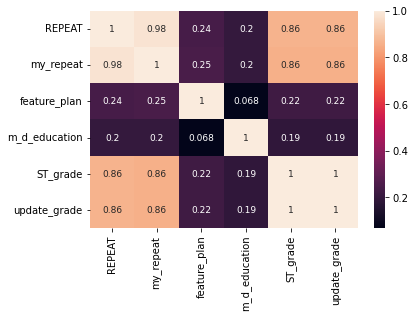

In [8]:
df=itemdf
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':9})
#展示五个新特征与“REPEAT”之间的相关性

In [9]:
data_itemdf = itemdf[:] #复制切片

In [10]:
data_itemdf=data_itemdf.drop(data_itemdf[data_itemdf['REPEAT']==0.0].index) #data_itemdf删除"REPEAT"为0的行

In [11]:
data_itemdf.head()

,REPEAT,my_repeat,feature_plan,m_d_education,ST_grade,update_grade
5,1.0,0,0,0,1,1
8,1.0,0,0,0,1,1
12,1.0,1,0,1,1,1
14,1.0,0,0,1,1,1
16,1.0,1,0,1,1,1


In [12]:
def Apriori(data_itemdf,L,LN,dict_,support,Threshold) :
#dict_表示对于所有频繁一项集所对应的值的字典，L记录所有的频繁项集，LN记录过程中被剔除的非频繁项集
    for col in data_itemdf.columns :
        if col == "REPEAT" or col =="CNTRYID":
            continue
        df=data_itemdf[col].value_counts().reset_index()
        num=[0,0]
        num[df[col][0]]=df["count"][0]/len(data_itemdf)
        num[1-df[col][0]]=1-num[df[col][0]]
        if num[1]>=Threshold :
            L[0].append({col})
            dict_[col]=1
            support.append(num[1])
        elif num[0]>=Threshold :
            L[0].append({col})
            dict_[col]=0
            support.append(num[0])
    #生成一频繁项集，得到对应的字典dict_
    K=0
    while True :
        for i in range(len(L[K])) :
            for j in range(len(L[K]))[i+1:] :
                flag=0
                temp=L[K][i].union(L[K][j])
                if len(temp)==K+2 :
                    for s in range(len(LN[K])) :
                        if LN[K][s] in temp :
                            flag=1
                else :
                    continue
                if flag==0 :
                    if temp in L[K+1] :
                        continue
                    num=0
                    df=data_itemdf[list(temp)].value_counts().reset_index()
                    for t in range(len(df)) :
                        for col in df.columns :
                            if col=="count" :
                                num=df["count"][t]/len(data_itemdf)
                            else :
                                if df[col][t]!=dict_[col] :
                                    break
                    if num>=Threshold :
                        L[K+1].append(temp)
                        support.append(num)
                    else :
                        LN[K+1].append(temp)
        K+=1
        if len(L[K])==0 or len(L[K])==1 :
            break      
        #生成K频繁项集，并将求得的支持度追加到support列表

In [13]:
def get_con(L,LS,df_con,lift,PS,F_con,itemdf,support,sign,Threshold) :
#计算置信度、lift、PS、和ψ-coefficient,根据置信度阙值剔除Apriori算法得到的一些项集
    for i in range(len(L)) :
        for j in range(len(L[i])) :
            temp_list=list(L[i][j])
            temp_list1=temp_list[:]
            temp_list1.append("REPEAT")
            LS.append(temp_list1)
            df=itemdf[temp_list1].value_counts().reset_index()
            sum_down,sum_up=0,0
            sum_down1=0
            for s in range(len(df)) :
                flag=1
                if df["REPEAT"][s]==1.0 :
                    sum_down1+=df["count"][s]
                for col in df.columns :
                    if (col in temp_list) and df[col][s]!=dict_[col] :
                        flag=0
                        break
                if flag :
                    sum_down+=df["count"][s]
                    if df["REPEAT"][s]==1.0 :
                        sum_up+=df["count"][s]
            df_con.append(sum_up/sum_down)
            if sign :
                lift.append(sum_up*len(itemdf)/(sum_down1*sum_down))
                PS.append(sum_up/len(itemdf)-(sum_down1*sum_down)/len(itemdf)**2)
                F_con.append((sum_up/len(itemdf)-(sum_down1*sum_down)/len(itemdf)**2)/math.sqrt((sum_down1/len(itemdf))*(sum_down/len(itemdf))*(1-sum_down/len(itemdf))*(1-sum_down1/len(itemdf))))
    i=0
    while(i<len(LS)) :
        while i<len(LS) and df_con[i] < Threshold :
            if sign :
                del LS[i],df_con[i],lift[i],PS[i],F_con[i],support[i]
            else :
                del LS[i],df_con[i],support[i]
        i+=1

In [14]:
L=[[],[],[],[],[]]
LN=[[],[],[],[],[]]
support=[]
dict_={}
LS=[]
df_con=[]
lift=[]
PS=[]
F_con=[]
Apriori(data_itemdf,L,LN,dict_,support,0.6)
get_con(L,LS,df_con,lift,PS,F_con,itemdf,support,1,0.15)

In [15]:
LS #查看得到的频繁项集

[['my_repeat', 'REPEAT'],
 ['feature_plan', 'REPEAT'],
 ['ST_grade', 'REPEAT'],
 ['update_grade', 'REPEAT'],
 ['ST_grade', 'my_repeat', 'REPEAT'],
 ['update_grade', 'my_repeat', 'REPEAT'],
 ['update_grade', 'ST_grade', 'REPEAT'],
 ['update_grade', 'ST_grade', 'my_repeat', 'REPEAT']]

In [22]:
dict_ #查看项目对应的值

{'my_repeat': 1, 'feature_plan': 0, 'ST_grade': 1, 'update_grade': 1}

- 在频繁项集中这些特征取值为均为如下所示
|antecedents  |value   |
|:----------|:----------|
|'my_repeat' |1                 |
|'feature_plan'|0              |
|'ST_grade'|1           |
|'update_grade|1                 |


In [17]:
support #一一对应的支持度

[0.9718746412581794,
 0.6259901274250947,
 0.9310067730455746,
 0.9310067730455746,
 0.9129835839742854,
 0.9129835839742854,
 0.9310067730455746,
 0.9129835839742854]

|antecedents  |consequentts                      |support    |
|:----------|:----------                        |:---------- |
|'my_repeat' |'REPEAT'=1|0.97187
|'feature_plan'|'REPEAT'=1|0.62599
|'ST_grade'|'REPEAT'=1|0.93101
|'update_grade|'REPEAT'=1|0.93101
|'update_grade', 'my_repeat'|'REPEAT'=1|0.91298
|'update_grade', 'my_repeat'|'REPEAT'=1|0.91298
|'update_grade', 'ST_grade'|'REPEAT'=1|0.93101
|'update_grade', 'ST_grade', 'my_repeat'|'REPEAT'=1|0.91298

In [16]:
df_con #一一对应的置信度

[0.9936619718309859,
 0.15951440690361268,
 0.8581102528832928,
 0.8581102528832928,
 0.998242751349316,
 0.998242751349316,
 0.8581102528832928,
 0.998242751349316]

In [18]:
lift #一一对应的lift值

[4.811007613815137,
 0.7723200121187888,
 4.154707614005941,
 4.154707614005941,
 4.833186348399581,
 4.833186348399581,
 4.154707614005941,
 4.833186348399581]

In [19]:
PS #一一对应的PS值

[0.15900714791373557,
 -0.038115154141809965,
 0.14600714661399386,
 0.14600714661399386,
 0.14955191775943313,
 0.14955191775943313,
 0.14600714661399386,
 0.14955191775943313]

In [20]:
F_con #一一对应的ψ-coefficient值

[0.9782885184248976,
 -0.24025956067293414,
 0.8649614661033822,
 0.8649614661033822,
 0.9437908097257651,
 0.9437908097257651,
 0.8649614661033822,
 0.9437908097257651]

|antecedents  |consequentts                      |confidence    |lift     |PS      |ψ-coefficient|
|:----------|:----------                        |:----------   |:----------|:---------|:---------|
|'my_repeat' |'REPEAT'=1| 0.99366|4.81101|0.15901|0.97829
|'feature_plan' |'REPEAT'=1|0.15951|0.77232|-0.03811|-0.24026
|'ST_grade'|'REPEAT'=1|0.85811|4.15470|0.14601|0.86496
|'update_grade'|'REPEAT'=1|0.85811|4.15470|0.14601|0.86496
|'ST_grade'，'my_repeat'	|'REPEAT'=1|0.99824|4.83319|0.14955| 0.94379
|'update_grade', 'my_repeat' |'REPEAT'=1|0.99824|4.83319|0.14955| 0.94379
|'update_grade', 'ST_grade'|'REPEAT'=1|0.85811|4.15471|0.14601|0.86496
|'update_grade', 'ST_grade', 'my_repeat'|'REPEAT'=1|0.99824|4.83319|0.14955| 0.94379

In [21]:
df=data["CNTRYID"].value_counts()
print(df) #查看关于"CNTRYID"的数据分布情况

CNTRYID
724.0    25955
484.0     5831
152.0     5676
591.0     4609
214.0      104
188.0        1
Name: count, dtype: int64


In [23]:
CNTRYID_itemdf

,CNTRYID,REPEAT,my_repeat,feature_plan,m_d_education,ST_grade,update_grade
0,152.0,0.0,0,0,0,0,0
1,152.0,0.0,0,0,0,0,0
2,152.0,0.0,0,0,0,0,0
3,152.0,0.0,0,0,0,0,0
4,152.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...
42171,724.0,0.0,0,0,0,0,0
42172,724.0,1.0,1,0,1,1,1
42173,724.0,0.0,0,0,0,0,0
42174,724.0,1.0,1,0,1,1,1


In [24]:
CNTRYID_itemdf_list=[]
CNTRYID_itemdf_list.append(CNTRYID_itemdf.drop(CNTRYID_itemdf[CNTRYID_itemdf["CNTRYID"]!=724].index))
CNTRYID_itemdf_list.append(CNTRYID_itemdf.drop(CNTRYID_itemdf[CNTRYID_itemdf["CNTRYID"]!=484].index))
CNTRYID_itemdf_list.append(CNTRYID_itemdf.drop(CNTRYID_itemdf[CNTRYID_itemdf["CNTRYID"]!=152].index))
CNTRYID_itemdf_list.append(CNTRYID_itemdf.drop(CNTRYID_itemdf[CNTRYID_itemdf["CNTRYID"]!=591].index))
CNTRYID_itemdf_list.append(CNTRYID_itemdf.drop(CNTRYID_itemdf[CNTRYID_itemdf["CNTRYID"]!=214].index))
CNTRYID_itemdf_list.append(CNTRYID_itemdf.drop(CNTRYID_itemdf[CNTRYID_itemdf["CNTRYID"]!=188].index))

In [25]:
data_itemdf_list=[]
for i in range(len(CNTRYID_itemdf_list)) :
    data_itemdf_list.append(CNTRYID_itemdf_list[i].drop(CNTRYID_itemdf_list[i][CNTRYID_itemdf_list[i]["REPEAT"]==0].index))
#删除"REPEAT"为0的行

In [29]:
#由于6个对应的CNTRYID其中有一个只有1行数据，故可以不给予考虑
for i in range(5) :
    print(i)
    L=[[],[],[],[],[]]
    LN=[[],[],[],[],[]]
    support=[]
    dict_={}
    LS=[]
    df_con=[]
    lift=[]
    PS=[]
    F_con=[]
    Apriori(data_itemdf_list[i],L,LN,dict_,support,0.6)
    get_con(L,LS,df_con,lift,PS,F_con,CNTRYID_itemdf_list[i],support,0,0.15)
    print(LS)
    print(support)
    #对每个CNTRYID打印出生成的得到的频繁项集和对应的支持度
    #可以明显发现对于不同CNTRYID得到的关联规则与频繁项集也不相同，具有较大差异

0
[['my_repeat', 'REPEAT'], ['ST_grade', 'REPEAT'], ['update_grade', 'REPEAT'], ['ST_grade', 'my_repeat', 'REPEAT'], ['update_grade', 'my_repeat', 'REPEAT'], ['update_grade', 'ST_grade', 'REPEAT'], ['update_grade', 'ST_grade', 'my_repeat', 'REPEAT']]
[1.0, 0.9589825119236884, 0.9589825119236884, 0.9589825119236884, 0.9589825119236884, 0.9589825119236884, 0.9589825119236884]
1
[['my_repeat', 'REPEAT'], ['ST_grade', 'REPEAT'], ['update_grade', 'REPEAT'], ['feature_plan', 'my_repeat', 'REPEAT'], ['my_repeat', 'm_d_education', 'REPEAT'], ['ST_grade', 'my_repeat', 'REPEAT'], ['update_grade', 'my_repeat', 'REPEAT'], ['ST_grade', 'feature_plan', 'REPEAT'], ['update_grade', 'feature_plan', 'REPEAT'], ['ST_grade', 'm_d_education', 'REPEAT'], ['update_grade', 'm_d_education', 'REPEAT'], ['update_grade', 'ST_grade', 'REPEAT'], ['feature_plan', 'my_repeat', 'm_d_education', 'REPEAT'], ['ST_grade', 'feature_plan', 'my_repeat', 'REPEAT'], ['update_grade', 'feature_plan', 'my_repeat', 'REPEAT'], ['ST